In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

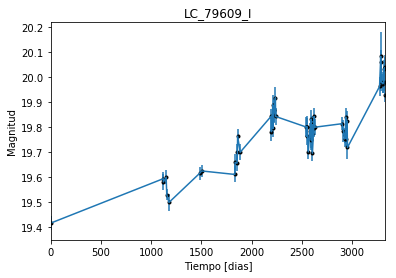

In [2]:
data = np.genfromtxt('LC_79609_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79609_I')
plt.savefig("LC_79609_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

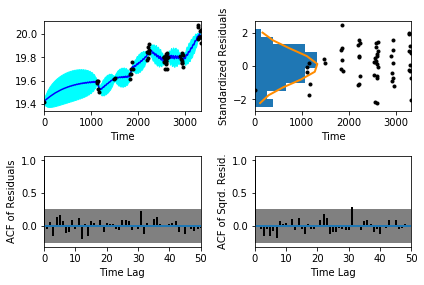

In [5]:
sample.assess_fit()

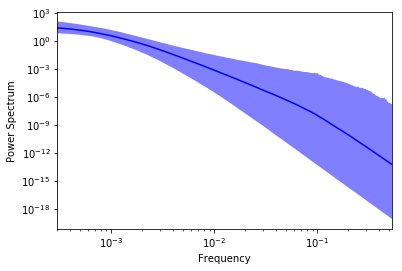

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

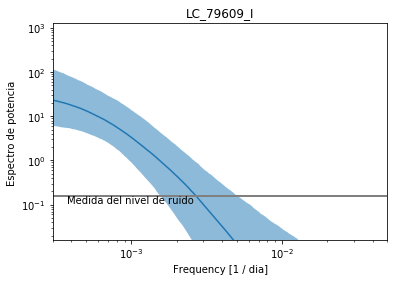

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79609_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79609_I')

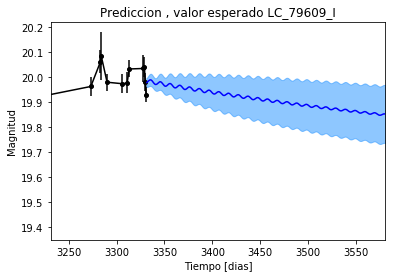

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79609_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79609_I')

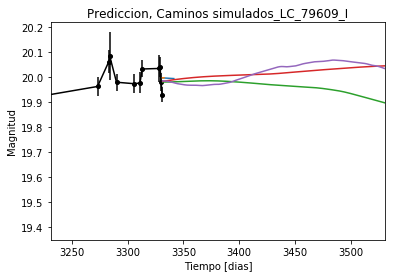

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79609_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


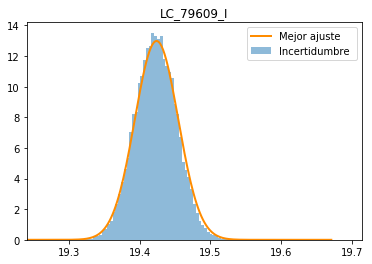

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79609_I')
plt.savefig("Mejor_ajuste_LC_79609_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79609_I')

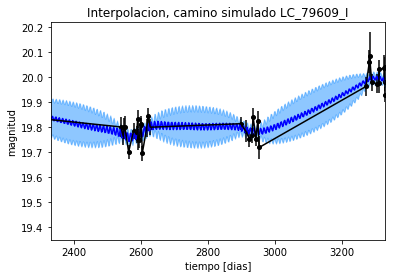

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_I')

Text(0.5,1,'Interpolacion, camino simulado LC_79609_I')

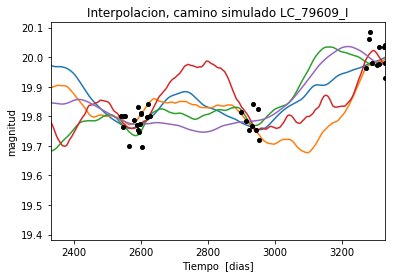

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 554.802628506
Median: 0.01085694383
Standard deviation: 0.182124351119
68% credibility interval: [ 0.00088096  0.16353129]
95% credibility interval: [  3.63628825e-04   7.11073615e-01]
99% credibility interval: [  3.10080915e-04   9.92521718e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1200.44602141
Median: 0.00132055583687
Standard deviation: 0.0804255600578
68% credibility interval: [ 0.00041761  0.02205099]
95% credibility interval: [ 0.00031417  0.22044478]
99% credibility interval: [  3.02025882e-04   5.66894308e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 361.826391657
Median: 0.00469217928359
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1403.41052463
Median: 107.139994637
Standard deviation: 1.54606642104
68% credibility interval: [ 105.40797373  108.17190681]
95% credibility interval: [ 103.00194271  108.75375207]
99% credibility interval: [ 101.03205403  110.48269007]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 541.521179999
Median: 0.443149824282
Standard deviation: 1.98321600276
68% credibility interval: [ 0.03780683  2.94998359]
95% credibility interval: [ 0.01198933  6.68708864]
99% credibility interval: [  9.55897130e-03   1.04453892e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 849.108546449
Median: 0.231784276651
Standard deviation: 9.33504085975
68% credibility interval: [ 0.00732071  5.35097391]
95% credibility interval: [  3.5

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0311442
Median: 2.79350141055e-55
Standard deviation: 1.38676068744e+41
68% credibility interval: [  1.96906691e-91   2.31631478e-08]
95% credibility interval: [  8.51482593e-135   2.64592779e+001]
99% credibility interval: [  1.87217141e-153   8.82990728e+032]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2369.81948727
Median: 19.694794449
Standard deviation: 0.114776663936
68% credibility interval: [ 19.5934313   19.79100722]
95% credibility interval: [ 19.45840103  19.91636502]
99% credibility interval: [ 19.33417189  20.05447954]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 505.779190728
Median: 0.00214380961862
Standard deviation: 0.235616407592
68% credibility interval: [ 0.          0.27560988]
95% credibility interval: [ 0.          0.89255171]
99% credibility interval: [ 0.          1.02785274]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 505.779190728
Median: 0.00214380961862
Standard deviation: 0.235616407592
68% credibility interval: [ 0.          0.27560988]
95% credibility interval: [ 0.          0.89255171]
99% credibility interval: [ 0.          1.02785274]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1076.76060233
Median: 0.0
Standard deviation: 0.000239850577886
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1403.41052463
Median: 107.139994637
Standard deviation: 1.54606642104
68% credibility interval: [ 105.40797373  108.17190681]
95% credibility interval: [ 103.00194271  108.75375207]
99% credibility interval: [ 101.03205403  110.48269007]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1862.1193862
Median: 0.0378585287425
Standard deviation: 0.0514795342514
68% credibility interval: [ 0.02159135  0.07577454]
95% credibility interval: [ 0.01334318  0.17323667]
99% credibility interval: [ 0.01069162  0.29736257]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1533.93907844
Median: 1.23736992651
Standard deviation: 0.191026244751
68% credibility interval: [ 1.0639133   1.43619662]
95% credibility interval: [ 0.9262712   1.67294453]
99% credibility interval: [ 0.82864256  1.83095517]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 626.590415822
Median: 2.98806962675e-05
Standard deviation: 0.176640288143
68% credibility interval: [  5.73713227e-07   1.12165929e-03]
95% credibility interval: [  7.08317068e-09   2.13123547e-02]
99% credibility interval: [  1.50392250e-37   3.92183052e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 554.802628506
Median: (-0.0682161899537-4.82745687499j)
Standard deviation: 1.87112763469
68% credibility interval: [-1.02749741+0.j -0.00553523+0.j]
95% credibility interval: [ -4.46780729e+00+0.j          -2.28474729e-03-0.00529564j]
99% credibility interval: [ -6.23619787e+00+0.j          -1.94829585e-03-0.00514103j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1200.44602141
Median: (-0.00829729703156+1.74673127935j)
Standard deviation: 1.56429059286
68% credibility interval: [-0.13855046+3.48036081j -0.00262389+0.j        ]
95% credibility interval: [-1.38509543 +1.89486908e+00j -0.00197402 +9.07737545e-05j]
99% credibility interval: [ -3.56190199e+00+5.06443636j  -1.89768458e-03+6.52820557j]
Posterior summary f